In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

# 定义日志文件路径
init_lr1e_3_lrsch1 = EventAccumulator('runs/resnet18_pretrained0_lr0.001_epoch200_dropout0.5_adam_lrsch1_628526').Reload()
init_lr25e_5_lrsch1 = EventAccumulator('runs/resnet18_pretrained0_lr0.00025_epoch200_dropout0.5_adam_lrsch1_652055').Reload()
init_lr5e_4_lrsch1 = EventAccumulator('runs/resnet18_pretrained0_lr0.0005_epoch300_dropout0.5_adam_lrsch1_477019').Reload()

pretrain_lr1e_5_lrsch0 = EventAccumulator('runs/resnet18_pretrained1_lr1e-05_epoch200_dropout0.5_adam_lrsch0_678938').Reload()
pretrain_lr1e_5_lrsch1 = EventAccumulator('runs/resnet18_pretrained1_lr1e-05_epoch200_dropout0.5_adam_lrsch1_629126').Reload()

simclr_lr1e_3_lrsch1 = EventAccumulator('runs/resnet18_pretrained2_lr0.001_epoch300_dropout0.5_adam_lrsch1_597138').Reload()
simclr_lr25e_5_lrsch1 = EventAccumulator('runs/resnet18_pretrained2_lr0.00025_epoch300_dropout0.5_adam_lrsch1_678196').Reload()
simclr_lr5e_4_lrsch1 = EventAccumulator('runs/resnet18_pretrained2_lr0.0005_epoch300_dropout0.5_adam_lrsch1_595602').Reload()


In [20]:
# 提取 epoch, loss 和 accuracy 数据
epochs = [x.step for x in init_lr1e_3_lrsch1.Scalars('Loss/test')]
train_loss_init_lr1e_3_lrsch1 = [x.value for x in init_lr1e_3_lrsch1.Scalars('Loss/train')]
train_accuracy_init_lr1e_3_lrsch1 = [x.value for x in init_lr1e_3_lrsch1.Scalars('Accuracy/train')]
val_loss_init_lr1e_3_lrsch1 = [x.value for x in init_lr1e_3_lrsch1.Scalars('Loss/test')]
val_accuracy_init_lr1e_3_lrsch1 = [x.value for x in init_lr1e_3_lrsch1.Scalars('Accuracy/test')]

epochs = [x.step for x in init_lr25e_5_lrsch1.Scalars('Loss/test')]
train_loss_init_lr25e_5_lrsch1 = [x.value for x in init_lr25e_5_lrsch1.Scalars('Loss/train')]
train_accuracy_init_lr25e_5_lrsch1 = [x.value for x in init_lr25e_5_lrsch1.Scalars('Accuracy/train')]
val_loss_init_lr25e_5_lrsch1 = [x.value for x in init_lr25e_5_lrsch1.Scalars('Loss/test')]
val_accuracy_init_lr25e_5_lrsch1 = [x.value for x in init_lr25e_5_lrsch1.Scalars('Accuracy/test')]

epochs = [x.step for x in init_lr5e_4_lrsch1.Scalars('Loss/test')][:200]
train_loss_init_lr5e_4_lrsch1 = [x.value for x in init_lr5e_4_lrsch1.Scalars('Loss/train')][:200]
train_accuracy_init_lr5e_4_lrsch1 = [x.value for x in init_lr5e_4_lrsch1.Scalars('Accuracy/train')][:200]
val_loss_init_lr5e_4_lrsch1 = [x.value for x in init_lr5e_4_lrsch1.Scalars('Loss/test')][:200]
val_accuracy_init_lr5e_4_lrsch1 = [x.value for x in init_lr5e_4_lrsch1.Scalars('Accuracy/test')][:200]

epochs = [x.step for x in pretrain_lr1e_5_lrsch0.Scalars('Loss/test')]
train_loss_pretrain_lr1e_5_lrsch0 = [x.value for x in pretrain_lr1e_5_lrsch0.Scalars('Loss/train')]
train_accuracy_pretrain_lr1e_5_lrsch0 = [x.value for x in pretrain_lr1e_5_lrsch0.Scalars('Accuracy/train')]
val_loss_pretrain_lr1e_5_lrsch0 = [x.value for x in pretrain_lr1e_5_lrsch0.Scalars('Loss/test')]
val_accuracy_pretrain_lr1e_5_lrsch0 = [x.value for x in pretrain_lr1e_5_lrsch0.Scalars('Accuracy/test')]

epochs = [x.step for x in pretrain_lr1e_5_lrsch1.Scalars('Loss/test')]
train_loss_pretrain_lr1e_5_lrsch1 = [x.value for x in pretrain_lr1e_5_lrsch1.Scalars('Loss/train')]
train_accuracy_pretrain_lr1e_5_lrsch1 = [x.value for x in pretrain_lr1e_5_lrsch1.Scalars('Accuracy/train')]
val_loss_pretrain_lr1e_5_lrsch1 = [x.value for x in pretrain_lr1e_5_lrsch1.Scalars('Loss/test')]
val_accuracy_pretrain_lr1e_5_lrsch1 = [x.value for x in pretrain_lr1e_5_lrsch1.Scalars('Accuracy/test')]

epochs = [x.step for x in simclr_lr1e_3_lrsch1.Scalars('Loss/test')][:200]
train_loss_simclr_lr1e_3_lrsch1 = [x.value for x in simclr_lr1e_3_lrsch1.Scalars('Loss/train')][:200]
train_accuracy_simclr_lr1e_3_lrsch1 = [x.value for x in simclr_lr1e_3_lrsch1.Scalars('Accuracy/train')][:200]
val_loss_simclr_lr1e_3_lrsch1 = [x.value for x in simclr_lr1e_3_lrsch1.Scalars('Loss/test')][:200]
val_accuracy_simclr_lr1e_3_lrsch1 = [x.value for x in simclr_lr1e_3_lrsch1.Scalars('Accuracy/test')][:200]

epochs = [x.step for x in simclr_lr25e_5_lrsch1.Scalars('Loss/test')][:200]
train_loss_simclr_lr25e_5_lrsch1 = [x.value for x in simclr_lr25e_5_lrsch1.Scalars('Loss/train')][:200]
train_accuracy_simclr_lr25e_5_lrsch1 = [x.value for x in simclr_lr25e_5_lrsch1.Scalars('Accuracy/train')][:200]
val_loss_simclr_lr25e_5_lrsch1 = [x.value for x in simclr_lr25e_5_lrsch1.Scalars('Loss/test')][:200]
val_accuracy_simclr_lr25e_5_lrsch1 = [x.value for x in simclr_lr25e_5_lrsch1.Scalars('Accuracy/test')][:200]

epochs = [x.step for x in simclr_lr5e_4_lrsch1.Scalars('Loss/test')][:200]
train_loss_simclr_lr5e_4_lrsch1 = [x.value for x in simclr_lr5e_4_lrsch1.Scalars('Loss/train')][:200]
train_accuracy_simclr_lr5e_4_lrsch1 = [x.value for x in simclr_lr5e_4_lrsch1.Scalars('Accuracy/train')][:200]
val_loss_simclr_lr5e_4_lrsch1 = [x.value for x in simclr_lr5e_4_lrsch1.Scalars('Loss/test')][:200]
val_accuracy_simclr_lr5e_4_lrsch1 = [x.value for x in simclr_lr5e_4_lrsch1.Scalars('Accuracy/test')][:200]



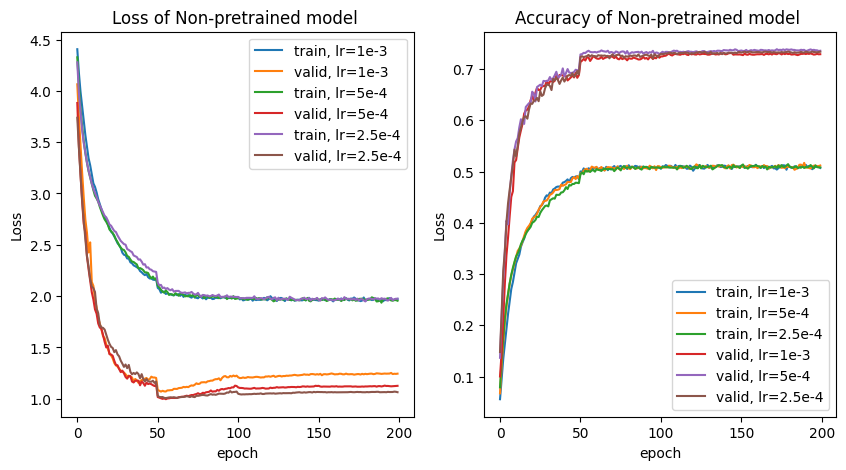

In [21]:
# 绘制 loss 曲线
# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_init_lr1e_3_lrsch1, label='train, lr=1e-3')
plt.plot(epochs, val_loss_init_lr1e_3_lrsch1, label='valid, lr=1e-3')
plt.plot(epochs, train_loss_init_lr5e_4_lrsch1, label='train, lr=5e-4')
plt.plot(epochs, val_loss_init_lr5e_4_lrsch1, label='valid, lr=5e-4')
plt.plot(epochs, train_loss_init_lr25e_5_lrsch1, label='train, lr=2.5e-4')
plt.plot(epochs, val_loss_init_lr25e_5_lrsch1, label='valid, lr=2.5e-4')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of Non-pretrained model ')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_init_lr1e_3_lrsch1, label='train, lr=1e-3')
plt.plot(epochs, train_accuracy_init_lr5e_4_lrsch1, label='train, lr=5e-4')
plt.plot(epochs, train_accuracy_init_lr25e_5_lrsch1, label='train, lr=2.5e-4')
plt.plot(epochs, val_accuracy_init_lr1e_3_lrsch1, label='valid, lr=1e-3')
plt.plot(epochs, val_accuracy_init_lr5e_4_lrsch1, label='valid, lr=5e-4')
plt.plot(epochs, val_accuracy_init_lr25e_5_lrsch1, label='valid, lr=2.5e-4')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy of Non-pretrained model ')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_init.png')
plt.show()
plt.close()

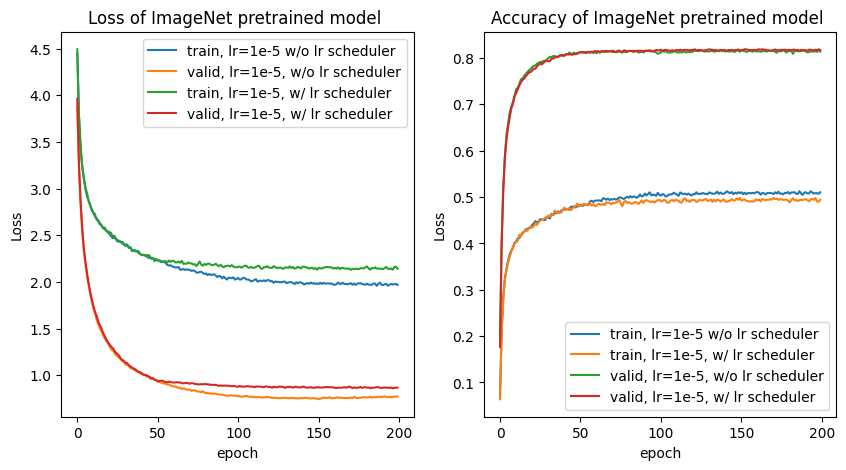

In [22]:
# 绘制 loss 曲线
# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_pretrain_lr1e_5_lrsch0, label='train, lr=1e-5 w/o lr scheduler')
plt.plot(epochs, val_loss_pretrain_lr1e_5_lrsch0, label='valid, lr=1e-5, w/o lr scheduler')
plt.plot(epochs, train_loss_pretrain_lr1e_5_lrsch1, label='train, lr=1e-5, w/ lr scheduler')
plt.plot(epochs, val_loss_pretrain_lr1e_5_lrsch1, label='valid, lr=1e-5, w/ lr scheduler')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of ImageNet pretrained model ')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_pretrain_lr1e_5_lrsch0, label='train, lr=1e-5 w/o lr scheduler')
plt.plot(epochs, train_accuracy_pretrain_lr1e_5_lrsch1, label='train, lr=1e-5, w/ lr scheduler')
plt.plot(epochs, val_accuracy_pretrain_lr1e_5_lrsch0, label='valid, lr=1e-5, w/o lr scheduler')
plt.plot(epochs, val_accuracy_pretrain_lr1e_5_lrsch1, label='valid, lr=1e-5, w/ lr scheduler')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy of ImageNet pretrained model ')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_pretrained.png')
plt.show()
plt.close()

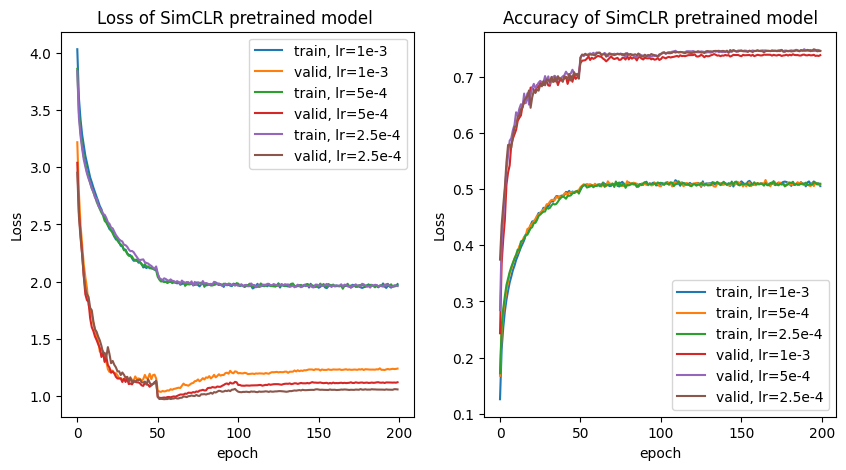

In [23]:
# 绘制 loss 曲线
# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_simclr_lr1e_3_lrsch1, label='train, lr=1e-3')
plt.plot(epochs, val_loss_simclr_lr1e_3_lrsch1, label='valid, lr=1e-3')
plt.plot(epochs, train_loss_simclr_lr5e_4_lrsch1, label='train, lr=5e-4')
plt.plot(epochs, val_loss_simclr_lr5e_4_lrsch1, label='valid, lr=5e-4')
plt.plot(epochs, train_loss_simclr_lr25e_5_lrsch1, label='train, lr=2.5e-4')
plt.plot(epochs, val_loss_simclr_lr25e_5_lrsch1, label='valid, lr=2.5e-4')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of SimCLR pretrained model ')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_simclr_lr1e_3_lrsch1, label='train, lr=1e-3')
plt.plot(epochs, train_accuracy_simclr_lr5e_4_lrsch1, label='train, lr=5e-4')
plt.plot(epochs, train_accuracy_simclr_lr25e_5_lrsch1, label='train, lr=2.5e-4')
plt.plot(epochs, val_accuracy_simclr_lr1e_3_lrsch1, label='valid, lr=1e-3')
plt.plot(epochs, val_accuracy_simclr_lr5e_4_lrsch1, label='valid, lr=5e-4')
plt.plot(epochs, val_accuracy_simclr_lr25e_5_lrsch1, label='valid, lr=2.5e-4')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy of SimCLR pretrained model')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_simclr.png')
plt.show()
plt.close()

In [24]:
print('init_lr1e_3_lrsch1', np.array(val_accuracy_init_lr1e_3_lrsch1).max(),np.array(val_accuracy_init_lr1e_3_lrsch1).argmax())
print('init_lr25e_5_lrsch1', np.array(val_accuracy_init_lr25e_5_lrsch1).max(),np.array(val_accuracy_init_lr25e_5_lrsch1).argmax())
print('init_lr5e_4_lrsch1', np.array(val_accuracy_init_lr5e_4_lrsch1).max(),np.array(val_accuracy_init_lr5e_4_lrsch1).argmax())
print('pretrain_lr1e_5_lrsch0', np.array(val_accuracy_pretrain_lr1e_5_lrsch0).max(),np.array(val_accuracy_pretrain_lr1e_5_lrsch0).argmax())
print('pretrain_lr1e_5_lrsch1', np.array(val_accuracy_pretrain_lr1e_5_lrsch1).max(),np.array(val_accuracy_pretrain_lr1e_5_lrsch1).argmax())
print('simclr_lr1e_3_lrsch1', np.array(val_accuracy_simclr_lr1e_3_lrsch1).max(),np.array(val_accuracy_simclr_lr1e_3_lrsch1).argmax())
print('simclr_lr25e_5_lrsch1', np.array(val_accuracy_simclr_lr25e_5_lrsch1).max(),np.array(val_accuracy_simclr_lr25e_5_lrsch1).argmax())
print('simclr_lr5e_4_lrsch1', np.array(val_accuracy_simclr_lr5e_4_lrsch1).max(),np.array(val_accuracy_simclr_lr5e_4_lrsch1).argmax())

init_lr1e_3_lrsch1 0.7311999797821045 143
init_lr25e_5_lrsch1 0.7342000007629395 179
init_lr5e_4_lrsch1 0.7386999726295471 172
pretrain_lr1e_5_lrsch0 0.817300021648407 125
pretrain_lr1e_5_lrsch1 0.8190000057220459 121
simclr_lr1e_3_lrsch1 0.7405999898910522 133
simclr_lr25e_5_lrsch1 0.7491000294685364 195
simclr_lr5e_4_lrsch1 0.7491999864578247 189


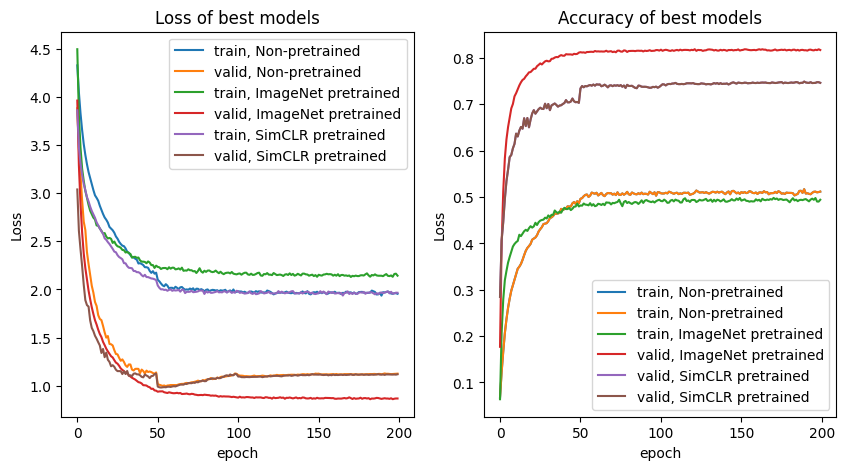

In [25]:
# 绘制图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_init_lr5e_4_lrsch1 , label='train, Non-pretrained')
plt.plot(epochs, val_loss_init_lr5e_4_lrsch1 , label='valid, Non-pretrained')
plt.plot(epochs, train_loss_pretrain_lr1e_5_lrsch1, label='train, ImageNet pretrained')
plt.plot(epochs, val_loss_pretrain_lr1e_5_lrsch1, label='valid, ImageNet pretrained')
plt.plot(epochs, train_loss_simclr_lr5e_4_lrsch1, label='train, SimCLR pretrained')
plt.plot(epochs, val_loss_simclr_lr5e_4_lrsch1, label='valid, SimCLR pretrained')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss of best models')

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_init_lr5e_4_lrsch1 , label='train, Non-pretrained')
plt.plot(epochs, train_accuracy_init_lr5e_4_lrsch1 , label='train, Non-pretrained')
plt.plot(epochs, train_accuracy_pretrain_lr1e_5_lrsch1, label='train, ImageNet pretrained')
plt.plot(epochs, val_accuracy_pretrain_lr1e_5_lrsch1, label='valid, ImageNet pretrained')
plt.plot(epochs, val_accuracy_simclr_lr5e_4_lrsch1, label='valid, SimCLR pretrained')
plt.plot(epochs, val_accuracy_simclr_lr5e_4_lrsch1, label='valid, SimCLR pretrained')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy of best models')

os.makedirs("plot_vis", exist_ok=True)
plt.savefig('plot_vis/loss_acc_best.png')
plt.show()
plt.close()